___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

## Get the Data

In [2]:
data = pd.read_csv('KNN_Project_Data')

In [3]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Pairplot

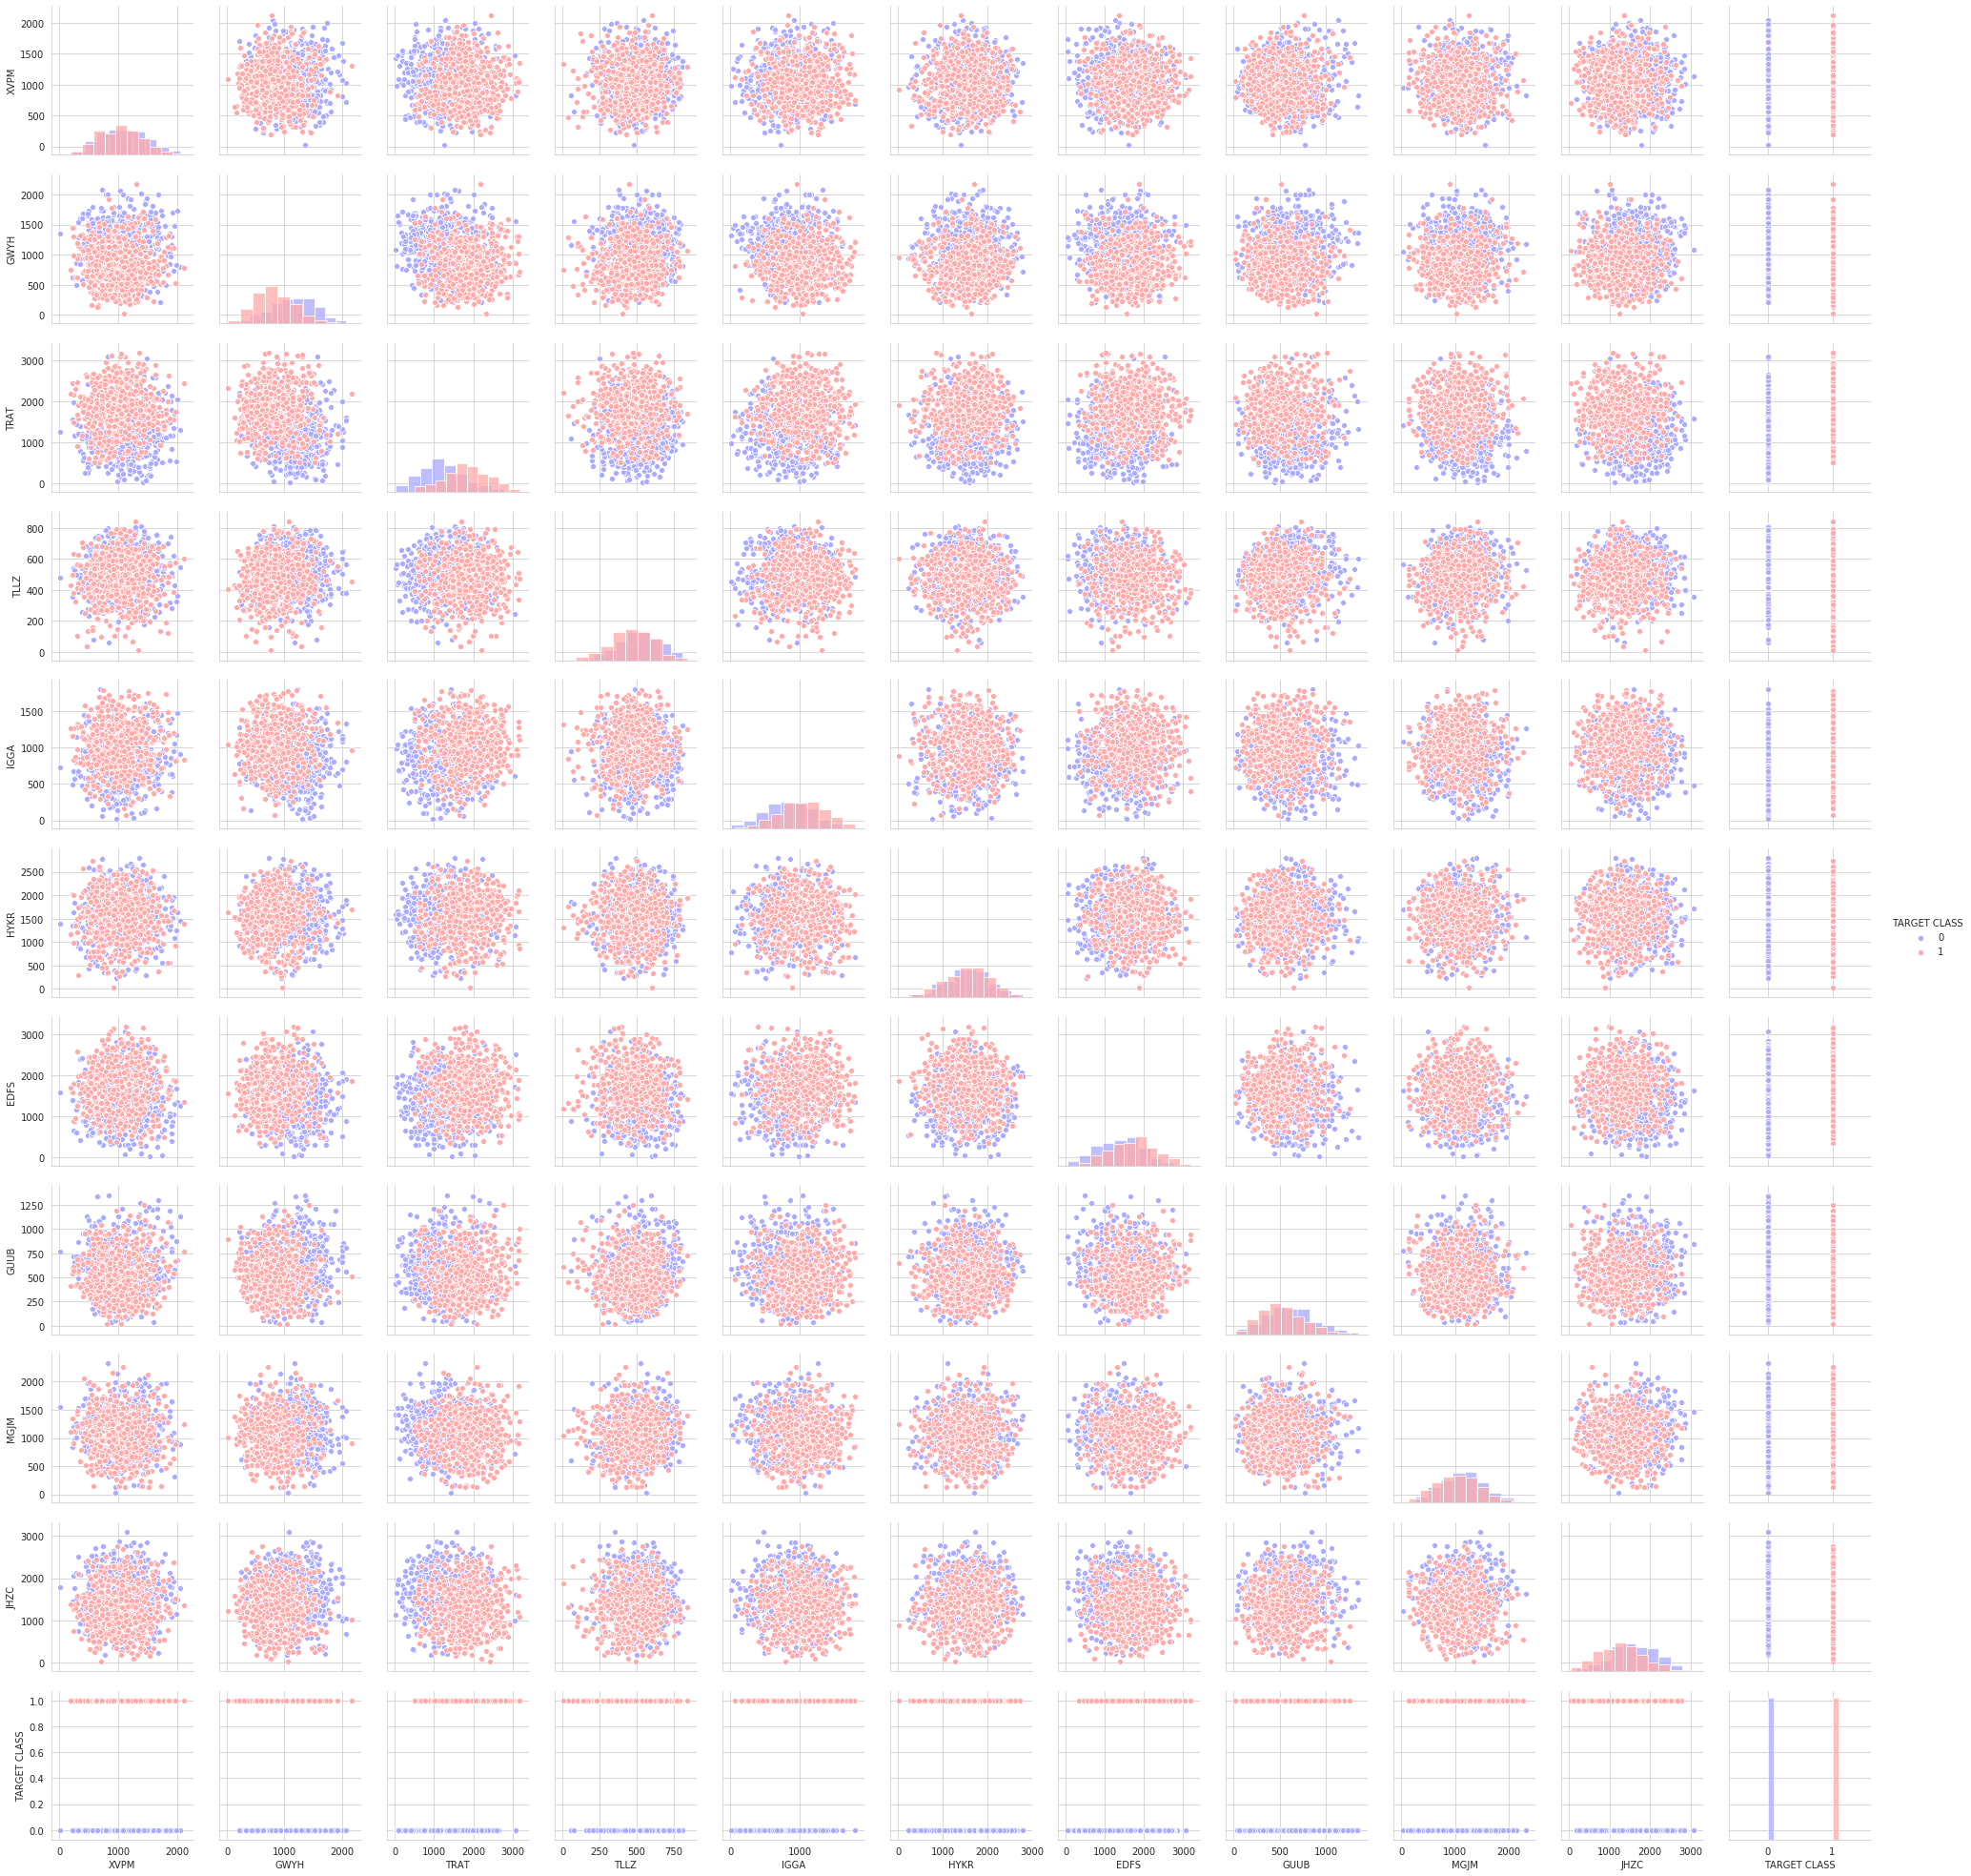

In [4]:
sns.pairplot(data, hue = 'TARGET CLASS', diag_kind = 'hist', diag_kws = {'alpha' : 0.75}, palette = 'bwr')

# Standardize the Variables

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [9]:
scaler.fit(data.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled = scaler.transform(data.drop('TARGET CLASS', axis = 1))

In [11]:
scaled_data = pd.DataFrame(scaled, columns = data.columns[: -1])

In [12]:
scaled_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Data

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X = scaled_data
y = data['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 102)

# Using KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations

In [19]:
predictions = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, predictions))

[[110  39]
 [ 39 112]]


In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       149
           1       0.74      0.74      0.74       151

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



# Choosing a K Value

In [23]:
errors_rate = []

for i in range(1, 30):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predict_i = knn.predict(X_test)
    
    errors_rate.append(np.mean(y_test != predict_i))

Text(0, 0.5, 'Errors Range')

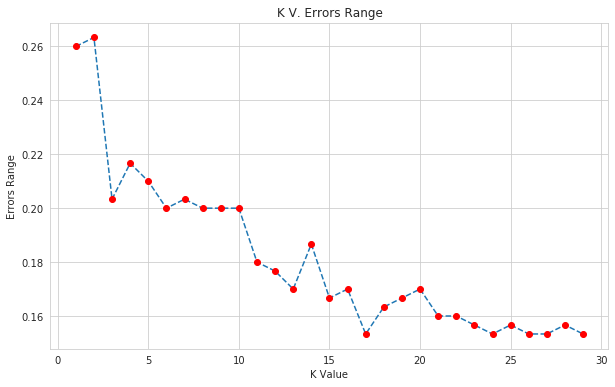

In [25]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), errors_rate, marker = 'o', mfc = 'r', mec = 'r', ls = '--')
plt.title('K V. Errors Range')
plt.xlabel('K Value')
plt.ylabel('Errors Range')

## Retrain with new K Value

In [34]:
knn = KNeighborsClassifier(n_neighbors = 30)

knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print('With K = 30')
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

With K = 30


[[124  25]
 [ 21 130]]


              precision    recall  f1-score   support

           0       0.86      0.83      0.84       149
           1       0.84      0.86      0.85       151

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [33]:
knn = KNeighborsClassifier(n_neighbors = 17)

knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print('With K = 17')
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

With K = 17


[[121  28]
 [ 18 133]]


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       149
           1       0.83      0.88      0.85       151

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

